# Import Library

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import numpy as np
import matplotlib.pyplot as plt, seaborn as sns #visualisasi data

import sklearn
from sklearn.model_selection import train_test_split as tts #pembagian data train dan test
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE #imbalance data

from sklearn.neighbors import KNeighborsClassifier as KNN #pembuatan model KNeighbors Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score #evaluasi dan performa

import warnings
warnings.filterwarnings('ignore')

# Import & Eksplore Data

In [ ]:
df_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)
df_raw.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photo

In [ ]:
df_raw.shape

(466285, 74)

In [ ]:
# cek jumlah duplicated rows dari semua kolom
df_raw.duplicated().sum()

0

Dapat diliht bahwa data yang digunakan pada project ini, tidak terdapat data yang terduplikat

Selanjutnya, Menghilangkan fitur yang tidak berguna seperti fitur dengan nilai unique seperti id, inputan bebas seperti deskripsi, fitur dengan nilai NULL yang terlalu banyak, dll.

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
cols_drop = [
        # unique id
    'id',
    'member_id',
    'zip_code',

    # free text
    'url',
    'desc',

    # all null / majority null
    'mths_since_last_record',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',

    # expert judgment
    'sub_grade'
]

In [ ]:
loan = df_raw.drop(cols_drop, axis=1)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [ ]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# Pre-Processing

### Correlation Check

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_title                    438697 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

<AxesSubplot:>

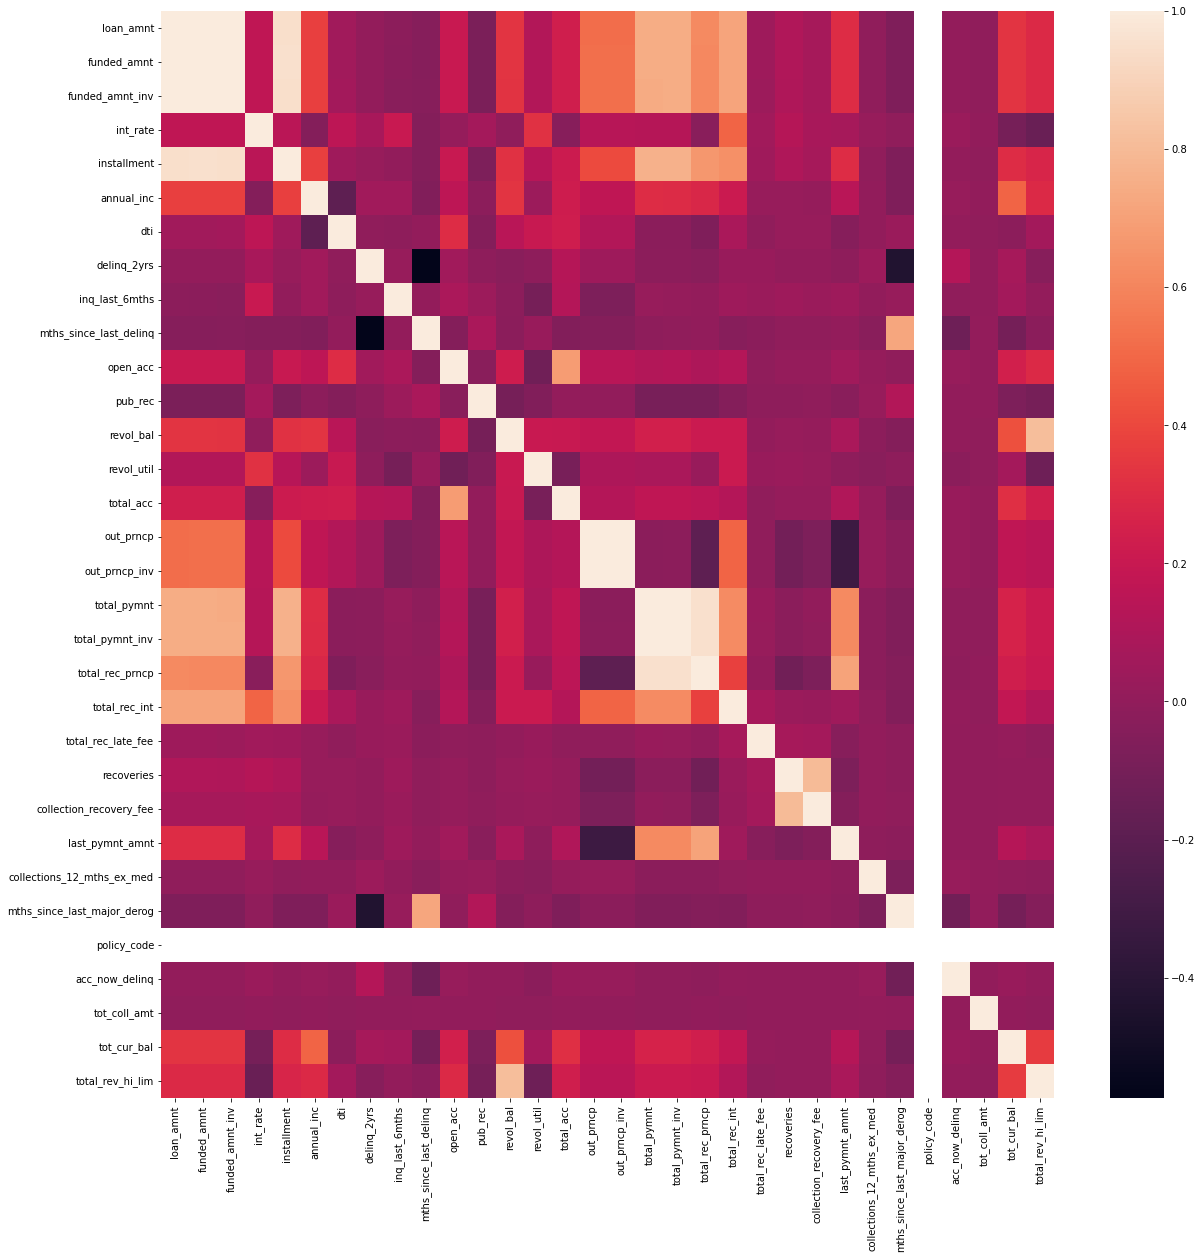

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(loan.corr())

fitur yang akan digunakan selanjutnya, adalah fitur yang memiliki nilai korelasi => 0.7

In [ ]:
corr_matrix = loan.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim']

In [ ]:
loan.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [ ]:
loan.select_dtypes(include='object').nunique()

term                        2
grade                       7
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

Dari hasil pengecekan fitur diatas, terdapat 2 fitur yang memiliki nilai unik sangat tinggi (High Cardinality) dan 1 fitur yang hanya memiliki 1 nilai unik yang perlu dihilangkan.

In [ ]:
loan.drop([
    #high cardinality
    'emp_title',
    'title',
    #1 value
    'application_type'
], axis=1, inplace=True)

In [ ]:
loan.select_dtypes(exclude='object').nunique()

loan_amnt                       1352
int_rate                         506
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
mths_since_last_delinq           145
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
total_rec_late_fee              5808
recoveries                     22773
collections_12_mths_ex_med         9
policy_code                        1
acc_now_delinq                     6
tot_coll_amt                    6321
tot_cur_bal                   220690
dtype: int64

Pada fitur dengan type data yang bukan `object`, juga terdapat 1 fitur yang memiliki 1 nilai unik. fitur ini akan dihilangkan sama seperti 3 fitur sebelumnya.

In [ ]:
loan.drop(#1 value
    'policy_code', axis=1, inplace=True)

In [ ]:
for col in loan.select_dtypes(include='object').columns.tolist():
    print(loan[col].value_counts(normalize=True)*100)
    print('\n')

 36 months    72.477776
 60 months    27.522224
Name: term, dtype: float64




B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years       5.879486
6 years       5.864215
8 years       5.029454
9 years       4.017275
Name: emp_length, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


Oct-14    8.317231
Jul-14    6.284997
Nov-14    5.373109
May-14    4.095993
Apr-14    4.089988
Aug-14    4.034871
Jun-14    3.684227
Mar-14    3.541396
Jan-14    3.351598
Feb-14    3.274607
Dec-13    3.221206
Nov-13    3.147431
Oct-13    3.026904
Sep-13    2.785206
Aug-13   

pada fitur `pymnt_plan`, fitur tersebut didominasi pada 1 nilai saja sehingga fitur ini juga akan dihapus

In [ ]:
loan.drop(#fitur didominasi salah satu nilai
    'pymnt_plan', axis=1, inplace=True)

### Feature Engineering

Pada langkah ini, dilakukan pembersihan beberapa fitur kedalam format yang dapat diproses untuk membuat model Machine Learning

emp_length

In [ ]:
mapping_emp_length = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

loan['emp_length'] = loan['emp_length'].map(mapping_emp_length)

term

In [ ]:
loan['term'] = loan['term'].str.replace(' months', '')
loan['term'] = loan['term'].astype(float)

mengubah fitur `earliest_cr_line`, `issue_d`, `last_pymnt_d`, `next_pymnt_d` `last_credit_pull_d` dari format bulan-tahun menjadi lama waktu berjalan sejak waktu tersebut. Pada project ini, karena menggunakan dataset tahun 2007-2014, maka kita akan mengubah waktu hari ini menjadi tahun 2017-12-01 sebagai reference date.

earliest_cr_line

In [ ]:
loan['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
loan['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [ ]:
loan['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan['earliest_cr_line']) / np.timedelta64(1, 'M')))
loan['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

terlihat pada data diatas, terdapat nilai negatif

In [ ]:
loan[loan['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'mths_since_earliest_cr_line']].head(10)

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-537.0
1770,2068-09-01,-609.0
2799,2064-09-01,-561.0
3282,2067-09-01,-597.0
3359,2065-02-01,-566.0
3413,2067-06-01,-594.0
3607,2067-08-01,-596.0
3989,2063-12-01,-552.0
4440,2068-09-01,-609.0
4449,2068-09-01,-609.0


nilai negatif tersebut terjadi karena kesalahan fungsi Python dalam menginterpretasikan tahun 1962 menjadi 2062.

Pada kasus ini, saya akan mengganti nilai negatif tersebut dengan nilai maksimum dari fitur tersebut, karena nilai negatif didapatkan dari data usia yang sudah tua, jadi masih relevan jika diganti dengan nilai maksimum.

In [ ]:
loan.loc[loan['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = loan['mths_since_earliest_cr_line'].max()

In [ ]:
loan.drop(['earliest_cr_line'], axis=1, inplace=True)

In [ ]:
loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

issue_d

In [ ]:
loan['issue_d_date'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan['issue_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
loan['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [ ]:
loan.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

last_pymnt_d

In [ ]:
loan['last_pymnt_d_date'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
loan['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [ ]:
loan.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

next_pymnt_d

In [ ]:
loan['next_pymnt_d_date'] = pd.to_datetime(loan['next_pymnt_d'], format='%b-%y')
loan['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
loan['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [ ]:
loan.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

last_credit_pull_d

In [ ]:
loan['last_credit_pull_d_date'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
loan['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [ ]:
loan.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Fitur Encoding

mengecek nilai/entri pada fitur kategori

In [ ]:
categorical_cols = [col for col in loan.select_dtypes(include='object').columns.tolist()]

In [ ]:
for col in categorical_cols:
    print(loan[col].value_counts())
    print('\n')

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64


MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64




Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64


Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                248

mengubah fitur `grade`, `home_ownership`, `purpose`, `addr_state` dan `initial_list_status` dari kategori menjadi binary menggunakan teknik `One-Hot Encoding`

In [ ]:
one_hot = ['grade', 'home_ownership', 'purpose', 'addr_state', 'initial_list_status']

In [ ]:
for cat in one_hot:
    onehots = pd.get_dummies(loan[cat], prefix=cat)
    loan = loan.join(onehots)

mengubah fitur `verification_status` dari kategori menjadi numerik menggunakan teknik Label Encoding.

In [ ]:
label_encoder = preprocessing.LabelEncoder()
loan['verification_status'] = label_encoder.fit_transform(loan['verification_status'])

In [ ]:
loan = loan.drop(columns=one_hot)
loan.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,5000,36.0,10.65,10.0,24000.0,2,Fully Paid,27.65,0.0,1.0,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.00,0.00,0.0,0.0,NaN,NaN,395.0,72.0,35.0,NaN,23.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500,60.0,15.27,0.0,30000.0,1,Charged Off,1.00,0.0,5.0,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.00,117.08,0.0,0.0,NaN,NaN,224.0,72.0,56.0,NaN,51.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36.0,15.96,10.0,12252.0,0,Fully Paid,8.72,0.0,2.0,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.00,0.00,0.0,0.0,NaN,NaN,193.0,72.0,42.0,NaN,23.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,10000,36.0,13.49,10.0,49200.0,1,Fully Paid,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,16.97,0.00,0.0,0.0,NaN,NaN,262.0,72.0,35.0,NaN,35.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3000,60.0,12.69,1.0,80000.0,1,Current,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,766.9,0.00,0.00,0.0,0.0,NaN,NaN,263.0,72.0,23.0,22.0,23.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Columns: 107 entries, loan_amnt to initial_list_status_w
dtypes: float64(24), int32(1), int64(2), object(1), uint8(79)
memory usage: 152.6+ MB


### Check Missing Value

In [ ]:
check_missing = loan.isnull().sum() * 100 / loan.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_delinq           53.690554
mths_since_next_pymnt_d          48.728567
tot_cur_bal                      15.071469
tot_coll_amt                     15.071469
emp_length                        4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
acc_now_delinq                    0.006219
pub_rec                           0.006219
open_acc                          0.006219
mths_since_earliest_cr_line       0.006219
inq_last_6mths                    0.006219
delinq_2yrs                       0.006219
total_acc                         0.006219
annual_inc                        0.000858
dtype: float64

### Handling Missing Value

missing value pada fitur `annual_inc` akan dimasukan rata-rata nilai dari fitur tersebut

In [ ]:
loan['annual_inc'].fillna(loan['annual_inc'].mean(), inplace=True)

missing value pada fitur lainnya akan di isi dengan nilai 0

In [ ]:
loan['tot_coll_amt'].fillna(0, inplace=True)
loan['tot_cur_bal'].fillna(0, inplace=True)
loan['emp_length'].fillna(0, inplace=True)
loan['revol_util'].fillna(0, inplace=True)
loan['collections_12_mths_ex_med'].fillna(0, inplace=True)
loan['delinq_2yrs'].fillna(0, inplace=True)
loan['inq_last_6mths'].fillna(0, inplace=True)
loan['open_acc'].fillna(0, inplace=True)
loan['pub_rec'].fillna(0, inplace=True)
loan['total_acc'].fillna(0, inplace=True)
loan['acc_now_delinq'].fillna(0, inplace=True)
loan['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan['mths_since_last_delinq'].fillna(0, inplace=True)
loan['mths_since_next_pymnt_d'].fillna(0, inplace=True)
loan['mths_since_last_pymnt_d'].fillna(0, inplace=True)
loan['mths_since_last_credit_pull_d'].fillna(0, inplace=True)

In [ ]:
check_missing = loan.isnull().sum() * 100 / loan.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

### Define Class Target

Pada project ini, tujuan utama yang ingin dicapai yaitu melakukan prediksi terhadap nasabah terkait kemampuannya untuk melakukan pembayaran terhadap pinjaman atau kredit yang diberikan. Maka, Variabel target yang akan digunakan yaitu variabel yang menunjukan kemampuan nasabah dalam melakukan pembayaran.

Pada dataset yang digunakan, terdapat variabel `loan_status`. Variabel ini yang akan dijadikan variabel Target karena menunjukan performa nasabah dalam melakukan pembayaran terhadap pinjaman atau kredit selama ini.

In [ ]:
loan.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Setelah melakukan checking nilai/entri pada fitur `loan_status`, diketahui `loan_status` memiliki beberapa nilai :

1. `Current` yaitu pembayaran lancar
2. `Charged Off` yaitu pembayaran macet sehingga dihapusbukukan
3. `Late` yaitu pembayaran telat dilakukan
4. `In Grace Period` yaitu dalam masa tenggang
4. `Fully Paid` yaitu pembayaran lunas
5. `Default` yaitu pembayaran macet

dari defini diatas, nilai pada `loan_status` akan dikelompokkan menjadi `bad loan` atau peminjam yang buruk dan `good loan` atau peminjam yang baik.

*Note : definisi Bad dan Good loan bisa berbeda tergantung kebutuhan bisnis. Pada kasus ini, batas keterlambatan bayar diatas 30 hari dan yang lebih buruk dari itu akan masuk kedalam `bad loan`.

In [ ]:
mapping_loan_status = {
    # Bad_Status
    'Charged Off' : 0,
    'Late (31-120 days)' : 0,
    'Default' : 0,
    'Does not meet the credit policy. Status:Charged Off' : 0,

    # Good_status
    'Late (16-30 days)' : 1,
    'In Grace Period' : 1,
    'Current' : 1,
    'Fully Paid' : 1,
    'Does not meet the credit policy. Status:Fully Paid' : 1
}

loan['loan_status'] = loan['loan_status'].map(mapping_loan_status)


menyimpan data yang telah dibersihkan kedalam bentuk.csv

In [ ]:
# loan.to_csv('loan_idxpartners2.csv')

In [ ]:
# loan = pd.read_csv('loan_idxpartners2.csv')

memisahkan antara data `input` dengan data `output` (Kelas Target)

In [ ]:
#memisahkan input & output
x = loan.drop(columns=['loan_status'])
y = loan['loan_status']

`Normalisasi` data menggunakan metode `MinMaxScaler`

In [ ]:
minmax_loan = pd.DataFrame()

for col in x.describe().columns:
    minmax_loan[col] = x[[col]].apply(lambda x: (x-x.min())/(x.max()-x.min()))

display(minmax_loan)

,loan_amnt,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,0.130435,0.0,0.253391,1.0,0.002948,1.0,0.691423,0.000000,0.030303,0.000000,0.035714,0.000000,0.005313,0.093803,0.057692,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.672913,0.400000,0.291667,0.000000,0.181102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.057971,1.0,0.477229,0.0,0.003748,0.5,0.025006,0.000000,0.151515,0.000000,0.035714,0.000000,0.000657,0.010535,0.025641,0.000000,0.000000,0.003493,0.0,0.0,0.0,0.000000,0.381601,0.400000,0.466667,0.000000,0.401575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.055072,0.0,0.510659,1.0,0.001381,0.0,0.218055,0.000000,0.060606,0.000000,0.023810,0.000000,0.001151,0.110389,0.064103,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.328790,0.400000,0.350000,0.000000,0.181102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.275362,0.0,0.390988,1.0,0.006309,0.5,0.500125,0.000000,0.030303,0.186170,0.119048,0.000000,0.002179,0.023535,0.237179,0.000000,0.047312,0.000000,0.0,0.0,0.0,0.000000,0.446337,0.400000,0.291667,0.000000,0.275591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.072464,1.0,0.352229,0.1,0.010416,0.5,0.448612,0.000000,0.000000,0.202128,0.178571,0.000000,0.010815,0.060406,0.243590,0.023846,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.448041,0.400000,0.191667,0.183333,0.181102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

melihat perbandingan antara data `good loan` = 1 dan `bad loan` = 0

<AxesSubplot:xlabel='loan_status', ylabel='count'>

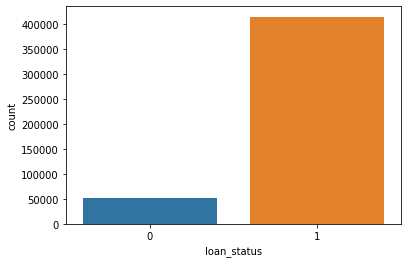

In [ ]:
sns.countplot(y)

dari hasil visualisasi diatas terlihat bahwa data yang dimiliki merupakan data yang tidak seimbang atau `Imbalanced Data`. Maka dari itu, data perlu diseimbangkan dengan menggunakan metode `SMOTE (Synthetic Minority Over-Sampling Technique)`

In [ ]:
#Resampling with SMOTE
smote = SMOTE(random_state=2021, n_jobs=-1, k_neighbors=5)
smote.fit(minmax_loan, y)
x_smote, y_smote = smote.fit_resample(minmax_loan, y)
print(x_smote.shape)
print(y_smote.shape)

(830634, 106)
(830634,)


<AxesSubplot:xlabel='loan_status', ylabel='count'>

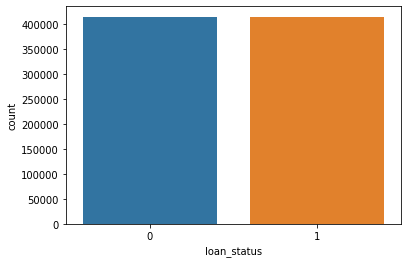

In [ ]:
sns.countplot(y_smote)

Setelah data sintetis berhasil dibuat, jumlah data antara data `good loan` dan `bad loan` menjadi seimbang dengan masing-masing data adalah 415.317 data.

selanjutnya data akan dibagi menjadi `data latih` dan `data uji` dengan pembagian data sebesar `70%` untuk `data latih` dan `30%` untuk `data uji`

In [ ]:
#split data kedalam training dan testing
x_train, x_test, y_train, y_test = tts(x_smote, y_smote, test_size=0.30, random_state=32)
print(len(x_train), len(x_test))

581443 249191


Setelah data berhasil dibagi, selanjutnya adalah membuat model `Machine Learning`. Pada kasus ini, Algoritma yang akan digunakan untuk melatih `data latih` adalah algoritma `KNN (K-Nearest Neighbours)`

In [ ]:
knn_model = KNN()
knn_model = knn_model.fit(x_train, y_train)

setelah model dilatih menggunakan `data latih`, selanjutnya adalah melakukan prediksi menggunakan `data test` yang sudah dipisahkan sebelumnya dan mengevaluasi model yang telah dibuat menggunakan `Confusion Matrix` dan `Classification Report`

<AxesSubplot:>

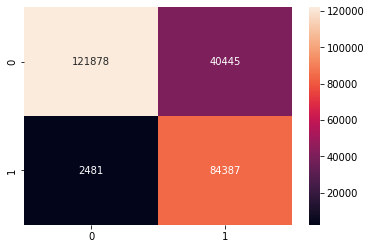

In [ ]:
#melakukan prediksi pada data test
y_pred = knn_model.predict(x_test)

#confussion Matrix
cm_knn = confusion_matrix(y_pred, y_test)
sns.heatmap(cm_knn, annot = True, fmt='d')

In [ ]:
#check performa dari model menggunakan classification_report
print(classification_report(y_test, y_pred))

#evaluasi model
acc_score = round(accuracy_score(y_pred, y_test), 2)
print('Accuracy model KNeighbors Classifier : ', acc_score)

              precision    recall  f1-score   support

           0       0.75      0.98      0.85    124359
           1       0.97      0.68      0.80    124832

    accuracy                           0.83    249191
   macro avg       0.86      0.83      0.82    249191
weighted avg       0.86      0.83      0.82    249191

Accuracy model KNeighbors Classifier :  0.83


Model yang telah dibangun menghasilkan `Akurasi = 83%`. Model Machine Learning ini dapat dikatakan sudah baik karena, Model Machine Learning yang mendapatkan akurasi 70% ke atas sudah termasuk model yang baik.